# Es_11_2

Nella seconda parte dell'esercitazione è stata implementata una diversa rete neurale per adattare la seguente funzione polinomiale:
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x$ in $[-1,1]$.
<br>
Per far convergere questa rete è stato aumentato il numero di dati di training e di test, confrontando poi diverse funzioni di attivazione, ottimizzazione e metriche: Nadam, Huber e RootMeanSquaredError; Adam, LogCosh e mse e infine Adam, Huber e mse. Le reti consistono in una sequenza di 5 strati identici, seguiti da uno strato di output.

La combinazione migliore sembra essere la seconda.

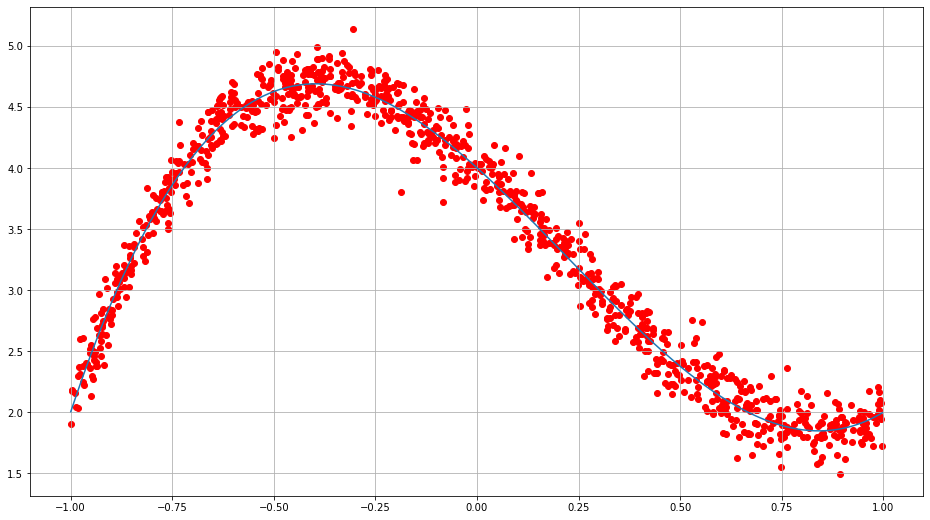

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
plt.rcParams['figure.figsize'] = [16,9]

# generate training inputs
np.random.seed(0) 
a = 3 
b = -2
c = -3
d = 4
def poly(x):
    return d+c*x+b*x**2.+a*x**3.

# generate training inputs
#np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = poly(x_valid) # ideal (target) linear function

sigma = 0.15 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(poly(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(poly(x_valid), sigma)

# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()



In [2]:
# compose the NN model

model = tf.keras.Sequential()

n_nodes = 15

model.add(Dense(n_nodes, input_shape=(1,),activation='selu'))

for i in range (4):
    model.add(Dense(n_nodes,activation='selu'))

model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='nadam', loss=tf.keras.losses.Huber(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

# get a summary of our composed model
model.summary()



2021-09-24 18:40:43.669615: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-24 18:40:43.673125: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
______________________________________________________

In [3]:
# fit the model using training dataset
# over 30 epochs of 8 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=160, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 5s 462us/sample - loss: 1.0635 - root_mean_squared_error: 1.9138 - val_loss: 0.1196 - val_root_mean_squared_error: 0.5091
Epoch 2/100
10000/10000 [==============================] - 1s 72us/sample - loss: 0.0781 - root_mean_squared_error: 0.4046 - val_loss: 0.0471 - val_root_mean_squared_error: 0.3072
Epoch 3/100
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0354 - root_mean_squared_error: 0.2664 - val_loss: 0.0332 - val_root_mean_squared_error: 0.2577
Epoch 4/100
10000/10000 [==============================] - 1s 86us/sample - loss: 0.0237 - root_mean_squared_error: 0.2179 - val_loss: 0.0209 - val_root_mean_squared_error: 0.2044
Epoch 5/100
10000/10000 [==============================] - 1s 90us/sample - loss: 0.0186 - root_mean_squared_error: 0.1927 - val_loss: 0.0221 - val_root_mean_squared_error: 0.2103
Epoch 6/100
10000/10000 [=========================

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0125 - root_mean_squared_error: 0.1582 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1636
Epoch 47/100
10000/10000 [==============================] - 1s 93us/sample - loss: 0.0127 - root_mean_squared_error: 0.1592 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1545
Epoch 48/100
10000/10000 [==============================] - 1s 78us/sample - loss: 0.0123 - root_mean_squared_error: 0.1571 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1918
Epoch 49/100
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0124 - root_mean_squared_error: 0.1576 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1631
Epoch 50/100
10000/10000 [==============================] - 1s 78us/sample - loss: 0.0122 - root_mean_squared_error: 0.1561 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1705
Epoch 51/100
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0129 - root_mean_square

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.013037233024835587
Test accuracy: 0.1614759
1000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.001983077009092085
Test accuracy: 0.06297742


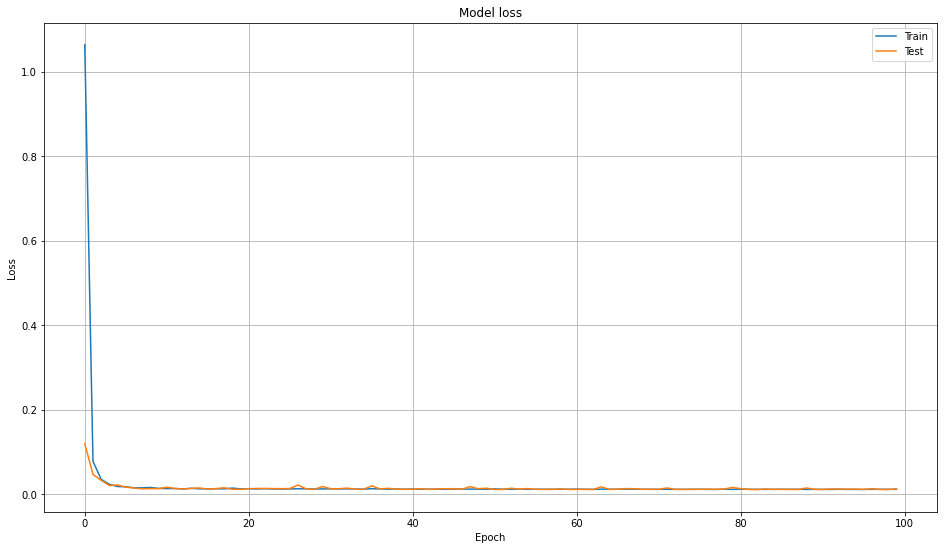

In [4]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(1)
plt.show()



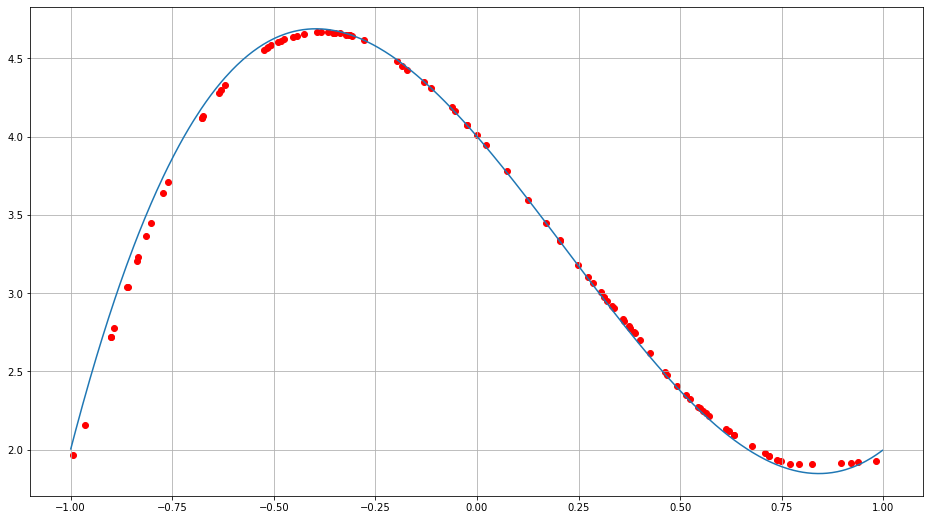

In [5]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [6]:
# compose the NN model

model = tf.keras.Sequential()

n_nodes = 15

model.add(Dense(n_nodes, input_shape=(1,),activation='elu'))

for i in range (4):
    model.add(Dense(n_nodes,activation='relu'))

model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss=tf.keras.losses.LogCosh(), metrics=['mse'])
# get a summary of our composed model
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
____________________________________________________

In [7]:
# fit the model using training dataset
# over 30 epochs of 8 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=160, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))


Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 282us/sample - loss: 2.2830 - mse: 10.0056 - val_loss: 1.5461 - val_mse: 5.9814
Epoch 2/100
10000/10000 [==============================] - 1s 60us/sample - loss: 0.6666 - mse: 2.1141 - val_loss: 0.2588 - val_mse: 0.7293
Epoch 3/100
10000/10000 [==============================] - 1s 52us/sample - loss: 0.1485 - mse: 0.3909 - val_loss: 0.0698 - val_mse: 0.1564
Epoch 4/100
10000/10000 [==============================] - 1s 58us/sample - loss: 0.0385 - mse: 0.0836 - val_loss: 0.0206 - val_mse: 0.0423
Epoch 5/100
10000/10000 [==============================] - 1s 62us/sample - loss: 0.0173 - mse: 0.0354 - val_loss: 0.0147 - val_mse: 0.0299
Epoch 6/100
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0134 - mse: 0.0273 - val_loss: 0.0126 - val_mse: 0.0256
Epoch 7/100
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0125 - mse: 0.0254 - val_

Epoch 59/100
10000/10000 [==============================] - 1s 63us/sample - loss: 0.0114 - mse: 0.0231 - val_loss: 0.0124 - val_mse: 0.0252
Epoch 60/100
10000/10000 [==============================] - 1s 53us/sample - loss: 0.0116 - mse: 0.0235 - val_loss: 0.0113 - val_mse: 0.0229
Epoch 61/100
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0115 - mse: 0.0232 - val_loss: 0.0117 - val_mse: 0.0237
Epoch 62/100
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0115 - mse: 0.0232 - val_loss: 0.0118 - val_mse: 0.0240
Epoch 63/100
10000/10000 [==============================] - 0s 49us/sample - loss: 0.0115 - mse: 0.0232 - val_loss: 0.0114 - val_mse: 0.0231
Epoch 64/100
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0115 - mse: 0.0233 - val_loss: 0.0115 - val_mse: 0.0234
Epoch 65/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.0116 - mse: 0.0235 - val_loss: 0.0113 - val_mse: 0.0229
Epoch 66/100


1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.011395648181438445
Test accuracy: 0.02308981
1000/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.00021211701631546022
Test accuracy: 0.0004243183


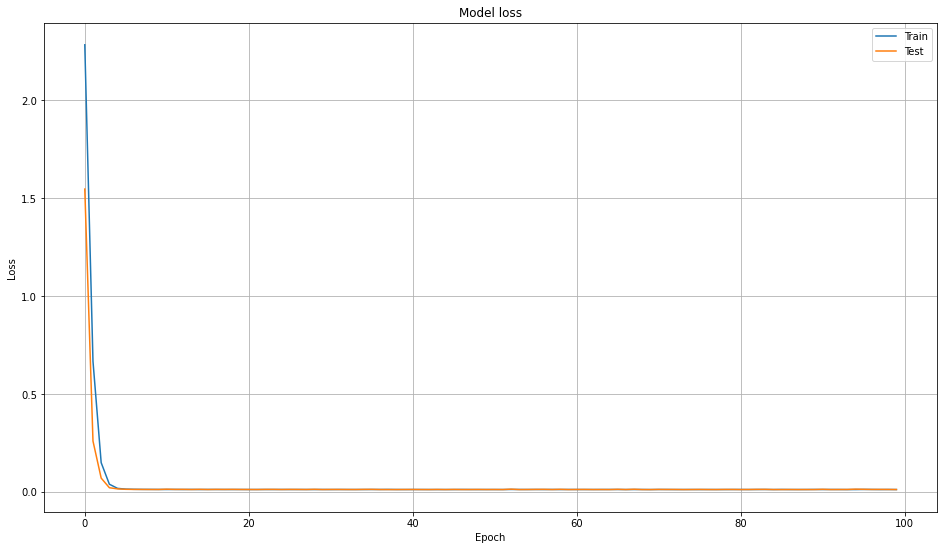

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(1)
plt.show()


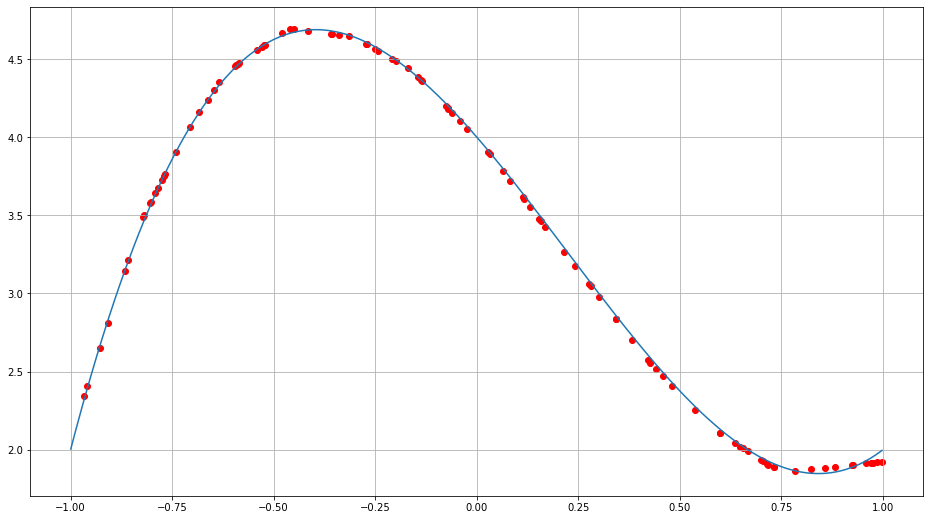

In [9]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [10]:
# compose the NN model

model = tf.keras.Sequential()

n_nodes = 15

model.add(Dense(n_nodes, input_shape=(1,),activation='elu'))

for i in range (4):
    model.add(Dense(n_nodes,activation='relu'))

model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mse'])
# get a summary of our composed model
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_13 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_14 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_15 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_16 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 16        
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
____________________________________________________

In [11]:
# fit the model using training dataset
# over 30 epochs of 8 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=160, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 2s 197us/sample - loss: 2.4990 - mse: 10.3535 - val_loss: 1.8898 - val_mse: 7.2281
Epoch 2/100
10000/10000 [==============================] - 0s 45us/sample - loss: 0.7796 - mse: 2.4103 - val_loss: 0.1913 - val_mse: 0.4529
Epoch 3/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.1072 - mse: 0.2379 - val_loss: 0.0501 - val_mse: 0.1009
Epoch 4/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0321 - mse: 0.0644 - val_loss: 0.0201 - val_mse: 0.0402
Epoch 5/100
10000/10000 [==============================] - 0s 45us/sample - loss: 0.0167 - mse: 0.0333 - val_loss: 0.0138 - val_mse: 0.0276
Epoch 6/100
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0130 - mse: 0.0260 - val_loss: 0.0123 - val_mse: 0.0247
Epoch 7/100
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0122 - mse: 0.0244 - val_

Epoch 59/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.0115 - mse: 0.0229 - val_loss: 0.0115 - val_mse: 0.0230
Epoch 60/100
10000/10000 [==============================] - 0s 47us/sample - loss: 0.0114 - mse: 0.0228 - val_loss: 0.0114 - val_mse: 0.0227
Epoch 61/100
10000/10000 [==============================] - 1s 51us/sample - loss: 0.0115 - mse: 0.0230 - val_loss: 0.0127 - val_mse: 0.0254
Epoch 62/100
10000/10000 [==============================] - 1s 64us/sample - loss: 0.0115 - mse: 0.0230 - val_loss: 0.0118 - val_mse: 0.0237
Epoch 63/100
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0115 - mse: 0.0231 - val_loss: 0.0115 - val_mse: 0.0229
Epoch 64/100
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0116 - mse: 0.0231 - val_loss: 0.0115 - val_mse: 0.0231
Epoch 65/100
10000/10000 [==============================] - 1s 52us/sample - loss: 0.0116 - mse: 0.0233 - val_loss: 0.0124 - val_mse: 0.0247
Epoch 66/100


1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.011878969877958298
Test accuracy: 0.02375794
1000/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test loss: 0.0006874679772590753
Test accuracy: 0.0013749358


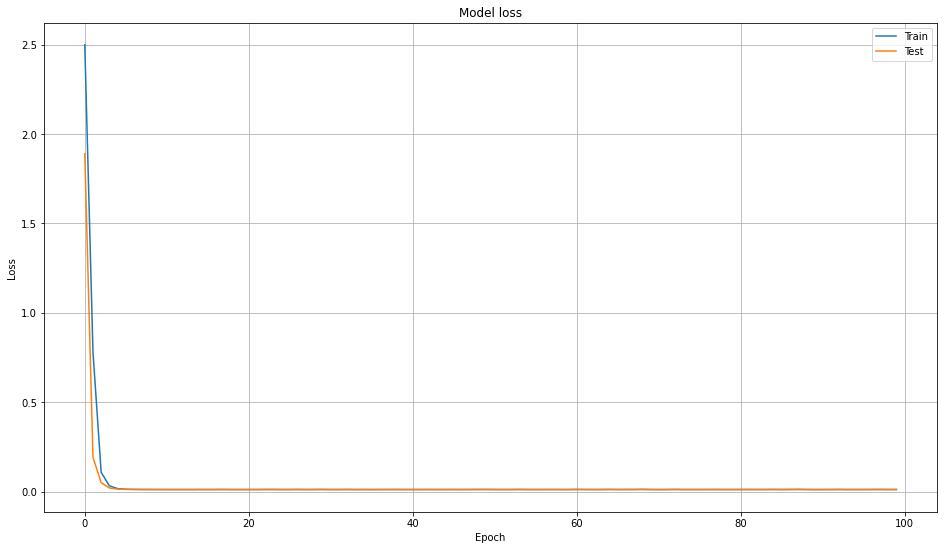

In [12]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(1)
plt.show()



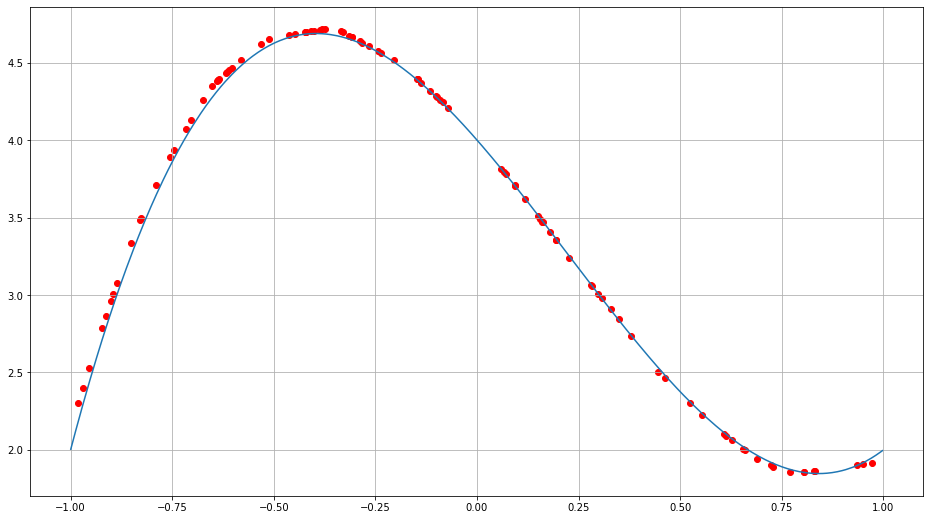

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()